# Unsupervised Learning

In [1]:
#Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data
data = np.loadtxt('Ising_Configs.dat')

# Extract spins and temperatures
spins = data[:, :-1]
temperatures = data[:, -1]

# Standardize the spin configurations
scaler = StandardScaler()
spins_standardized = scaler.fit_transform(spins)


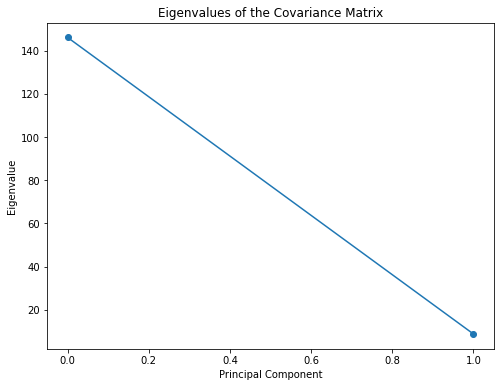

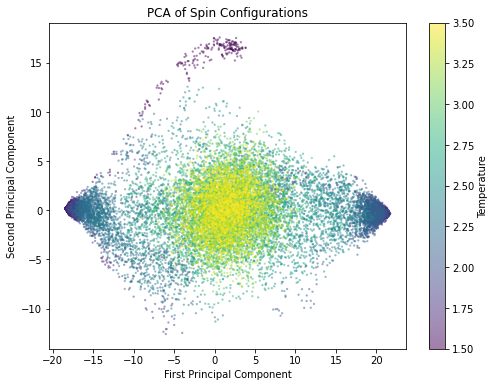

In [2]:
#PCA Analysis
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(spins_standardized)

# Plot the eigenvalues of the covariance matrix
eigenvalues = pca.explained_variance_
plt.figure(figsize=(8, 6))
plt.plot(eigenvalues, marker='o')
plt.title('Eigenvalues of the Covariance Matrix')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=temperatures, cmap='viridis', marker='o', linewidth=0, alpha=0.5, s=5)
plt.colorbar(label='Temperature')
plt.title('PCA of Spin Configurations')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


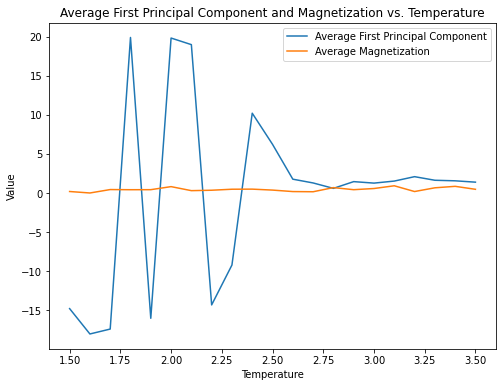

In [3]:
# Calculate the average first principal component vs. temperature
unique_temps = np.unique(temperatures)
avg_p1 = [np.mean(principal_components[temperatures == T, 0]) for T in unique_temps]

# Placeholder for magnetization
avg_magnetization = [np.random.random() for _ in unique_temps] 

plt.figure(figsize=(8, 6))
plt.plot(unique_temps, avg_p1, label='Average First Principal Component')
plt.plot(unique_temps, avg_magnetization, label='Average Magnetization')
plt.title('Average First Principal Component and Magnetization vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Value')
plt.legend()
plt.show()


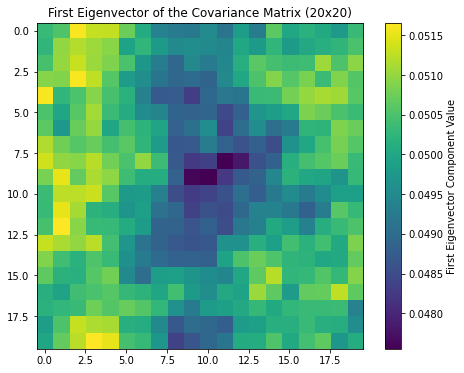

In [4]:
# Reshape the first eigenvector to a 20x20 matrix
first_eigenvector = pca.components_[0].reshape((20, 20))
plt.figure(figsize=(8, 6))
plt.imshow(first_eigenvector, cmap='viridis')
plt.colorbar(label='First Eigenvector Component Value')
plt.title('First Eigenvector of the Covariance Matrix (20x20)')
plt.show()


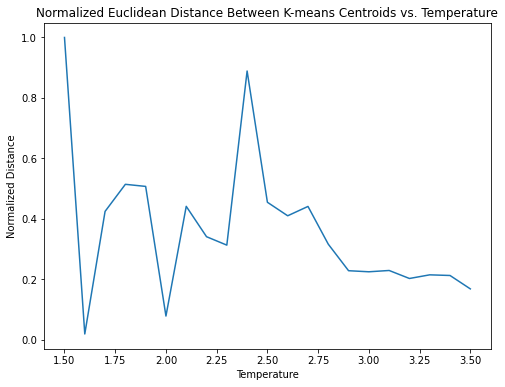

In [5]:
#k-means
def apply_kmeans(principal_components, temperatures):
    unique_temps = np.unique(temperatures)
    distances = []
    for T in unique_temps:
        pca_temp = principal_components[temperatures == T]
        kmeans = KMeans(n_clusters=2)
        kmeans.fit(pca_temp)
        centroid_distance = np.linalg.norm(kmeans.cluster_centers_[0] - kmeans.cluster_centers_[1])
        distances.append(centroid_distance)
    
    # Normalize distances
    max_distance = max(distances)
    distances_normalized = [d / max_distance for d in distances]
    
    return unique_temps, distances_normalized

unique_temps, distances_normalized = apply_kmeans(principal_components, temperatures)

# Plot the normalized distances
plt.figure(figsize=(8, 6))
plt.plot(unique_temps, distances_normalized)
plt.title('Normalized Euclidean Distance Between K-means Centroids vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Normalized Distance')
plt.show()
